In [1]:
import json
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
def lire_fichier (chemin):
    with open(chemin) as json_data: 
        texte =json.load(json_data)
    return texte

../DATA_ELTeC-Por_spaCy3.5.1_d/CASTRO-OSORIO/CASTRO_OCR/CASTRO-OSORIO_Kraken-jspl-ELTeC/SIM/word_CASTRO-OSORIO_quatro-novelas_Kraken-jspl-ELTeC.json
CASTRO-OSORIO
Kraken-jspl-ELTeC
Version :  Kraken--jspl-ELTeCpt
../DATA_ELTeC-Por_spaCy3.5.1_d/CASTRO-OSORIO/CASTRO_OCR/CASTRO-OSORIO_Kraken/SIM/word_CASTRO-OSORIO_quatro-novelas_krakenbase.json
CASTRO-OSORIO
Kraken
Version :  Kraken
../DATA_ELTeC-Por_spaCy3.5.1_d/CASTRO-OSORIO/CASTRO_OCR/CASTRO-OSORIO_TesseractPor-PNG-jspl-ELTeC/SIM/word_CASTRO-OSORIO_quatro-novelas_TesseractPor-PNG-jspl-ELTeC.json
CASTRO-OSORIO
TesseractPor-PNG-jspl-ELTeC
Version :  Tess. pt -- jspl-ELTeCpt
../DATA_ELTeC-Por_spaCy3.5.1_d/CASTRO-OSORIO/CASTRO_OCR/CASTRO-OSORIO_TesseractPor-PNG/SIM/word_CASTRO-OSORIO_quatro-novelas_TesseractPor-PNG.json
CASTRO-OSORIO
TesseractPor-PNG
Version :  TesseractPor-PNG
Version :  Tess. pt
../DATA_ELTeC-Por_spaCy3.5.1_d/DE-QUEIROS_CASA/DE-QUEIROS-CASA_OCR/DE-QUEIROS-CASA_Kraken-jspl-ELTeC/SIM/word_DE-QUEIROS_Casa-de-Ramires_Kraken-

,Auteur,Configuration,Distance,Metric
1,CASTRO-OSORIO,Kraken,0.059503,cosinus
5,DE-QUEIROS-CASA,Kraken,0.059854,cosinus
9,DE-QUEIROS,Kraken,0.060197,cosinus
13,DINIZ,Kraken,0.058298,cosinus
0,CASTRO-OSORIO,Kraken--jspl-ELTeCpt,0.044030,cosinus
4,DE-QUEIROS-CASA,Kraken--jspl-ELTeCpt,0.045350,cosinus
8,DE-QUEIROS,Kraken--jspl-ELTeCpt,0.055214,cosinus
12,DINIZ,Kraken--jspl-ELTeCpt,0.054355,cosinus
3,CASTRO-OSORIO,Tess. pt,0.012842,cosinus
7,DE-QUEIROS-CASA,Tess. pt,0.012841,cosinus


/tmp/ipykernel_30778/1351732813.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Distance",  y="Configuration", data=data_tab,
/tmp/ipykernel_30778/1351732813.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Distance", y="Configuration", data=data_tab,


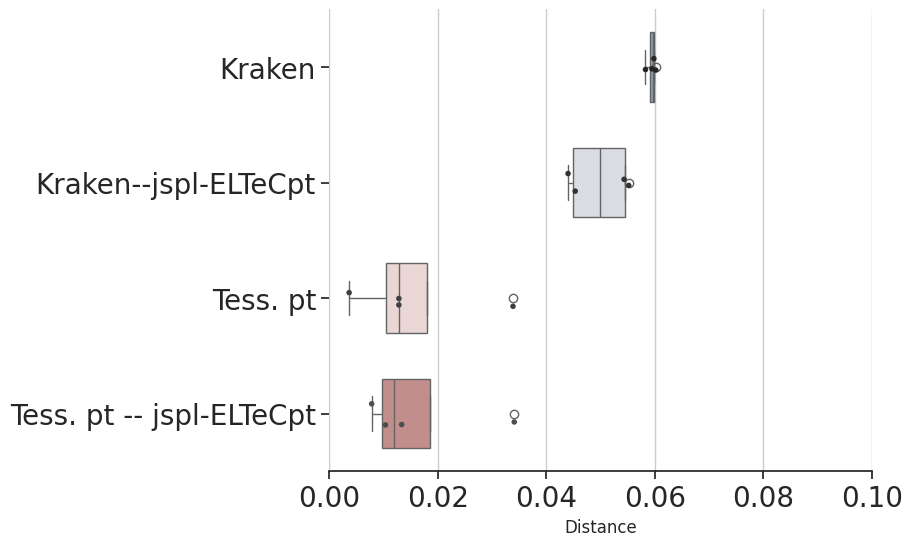

In [90]:
tableau={}
liste_auteur=[]
liste_version_spacy=[]
liste_config=[]
liste_dist=[]
liste_auteur=[]
liste_name_metric=[]
liste_version=[]
liste_vers_ocr=["kraken","Kraken-base.txt","kraken-jspll-pretrain","tesseract","tesseract-jspll-pretrain",]


# path_data = "../ELTeC-fra_09072024_EVAL_char2-3/*/OCR/*/SIM/*.json"
lt_version_doc=["fra_spaCy3.5.1","eng_spaCy3.5.1","Por_spaCy3.5.1"]
version_doc=lt_version_doc[-1]
calcul=["sim2-3","word"]
calc=calcul[-1]
x=0.1
# path_data = f"../DATA_ELTeC-{version_doc}_d/*/*OCR/*/NER/SIM/{calc}*.json"## NER
path_data = f"../DATA_ELTeC-{version_doc}_d/*/*OCR/*/SIM/{calc}*.json"## Text
for path in glob.glob(path_data):
    print(path)
    autor=path.split("/")[4]
    autor=autor.split("_")[0]
    print(autor)
    version=path.split("/")[4]
    version=version.split("_")[-1]
    print(version)
    distance=lire_fichier(path)
    # print(distance)

    if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
        version=re.sub("Kraken-base.txt|kraken|Kraken","Kraken",version)
        print("Version : ", version)
        
    if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
        version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain","Kraken--jspl-fr",version)
        print("Version : ", version)
    if version=="Kraken-jspll-pretrain":
        version=re.sub("Kraken-jspll-pretrain","Kraken--jspl-en",version)
        print("Version : ", version)
        
    if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
        version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC","Kraken--jspl-ELTeCfr",version)
        print("Version : ", version)
    if  version=="Kraken-jspll-ELTeC":
        version=re.sub("Kraken-jspll-ELTeC","Kraken--jspl-ELTeCen",version)
        print("Version : ", version)
    if  version=="Kraken-jspl-ELTeC":
        version=re.sub("Kraken-jspl-ELTeC","Kraken--jspl-ELTeCpt",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="tesseract" or version=="Tesseract-PNG" or version=="TesseractPor-PNG":
        version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG","Tess. fr",version)
        print("Version : ", version)
        
    if version=="tesseract" or version=="Tesseract-PNG":
         version=re.sub("tesseract|Tesseract-PNG","Tess.",version)
         print("Version : ", version)
    if version=="TesseractPor-PNG":
        version=re.sub("TesseractPor-PNG","Tess. pt",version)
        print("Version : ", version)
        
    if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain":
        version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain","Tess. fr -- jspl-fr",version)
        print("Version : ", version)
    if  version=="tesseract-jspll-pretrain" or version =="Tesseract-PNG-jspll-pretrain" :
        version=re.sub("tesseract-jspll-pretrain|Tesseract-PNG-jspll-pretrain","Tess. -- jspl-en",version)
        print("Version : ", version)
        
    if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
        version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC","Tess. fr -- jspl-ELTeCfr",version)
        print("Version : ", version)
    if  version=="Tesseract-PNG-jspll-ELTeC":
        version=re.sub("Tesseract-PNG-jspll-ELTeC","Tess. -- jspl-ELTeCen",version)
        print("Version : ", version)
    if version =="TesseractPor-PNG-jspl-ELTeC":
        version=re.sub("TesseractPor-PNG-jspl-ELTeC","Tess. pt -- jspl-ELTeCpt",version)
        print("Version : ", version)
# 
# 
# 
    liste_distance=[]
    for key, res_dist in distance.items():
        # print("Key : ",key)
        if key == "cosinus":
            for r in res_dist:
            #     if paire =="spaCy_lg" and name_metric=="cosinus":#or paire=="sm--sm" or paire=="md--md":
                liste_name_metric.append(key)
                # liste_version.append(version)
                liste_config.append(version)#+"--"+paire)
                liste_auteur.append(autor)
                # liste_version_spacy.append(version_spacy)
                liste_dist.append(r)
#         
#         
#         # if key=="KL_res":
#         #     for k, v in res_dist.items():
#         #         if k=="Cosine Dist.":
#         #             print(v)
#         #             liste_name_metric.append(k)
#         #             # liste_version.append(version)
#         #             liste_config.append(version)#+"--"+paire)
#         #             liste_auteur.append(autor)
#         #             # liste_version_spacy.append(version_spacy)
#         #             liste_dist.append(v)
# 
tableau["Auteur"]=liste_auteur
# tableau["Version"]=liste_version
tableau["Configuration"]=liste_config
tableau["Distance"]=liste_dist
tableau["Metric"]=liste_name_metric
# tableau["Version_spacy"]=liste_version_spacy
data_tab = pd.DataFrame(tableau)
data_tab=data_tab.sort_values(by = 'Configuration')
display(data_tab)


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("linear")

# Load the example planets dataset
# planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
# sns.boxplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")],  y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
#             whis=[0, 100], width=.6, palette="vlag")
sns.boxplot(x="Distance",  y="Configuration", data=data_tab,
            whis=[0, 1], width=.6, palette="vlag")#, legend=False)

# Add in points to show each observation
# sns.stripplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")], y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
#               size=4, color=".3", linewidth=0)
sns.stripplot(x="Distance", y="Configuration", data=data_tab,
              size=4, palette='dark:.3', linewidth=0)#, legend=False)

# Tweak the visual presentation
plt.tick_params(axis = 'both', labelsize = 20)
ax.xaxis.grid(True)
ax.set(ylabel="")
plt.xlim([0,x])



sns.despine(trim=True, left=True)
plt.savefig(f"../Boite-a_moustache/ELTeC_{version_doc}-{key}-{calc}.png",dpi=300, bbox_inches="tight")
# plt.savefig(f"../Boite-a_moustache/ELTeC_{version_doc}-lg-{key}-{calc}.png",dpi=300, bbox_inches="tight")

In [28]:
# !python --version

Python 3.12.4
